# Морфологічні перетворення

У даній лабораторній роботі розглянуто наступні приклади морфологічної обробки зображень
1. Ерозія
2. Діляція
3. Морфологічне відкриття
4. Морфологічне закриття
5. Морфологічний градієнт
6. Ізоляція локальних максимумів
7. Ізоляція темних регіонів

### Імпортуємо необхдіні пакети та бібліотеки

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Зчитуємо вихідне зображення

In [130]:
img = cv2.imread("./examples/Fig0905a.tif")

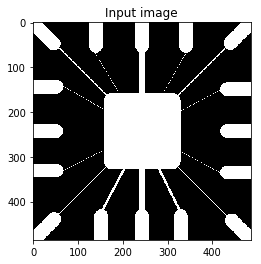

In [131]:
plt.imshow(img); plt.title('Input image'); plt.show();

### Встановлюємо ядро 

In [132]:
kernel = np.ones((5,5),np.uint8)

<h3>1. Erosion</h3>

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

In [133]:
erosion = cv2.erode(img,kernel,iterations = 1)

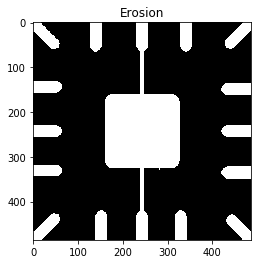

In [134]:
plt.imshow(erosion, cmap = 'gray'); plt.title('Erosion'); plt.show()

<h3>2. Dilation</h3>

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

In [135]:
img = cv2.imread("./examples/Fig0907a.tif")

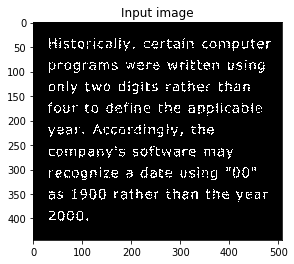

In [136]:
plt.imshow(img); plt.title('Input image'); plt.show();

In [137]:
dilation = cv2.dilate(img,kernel,iterations = 1)

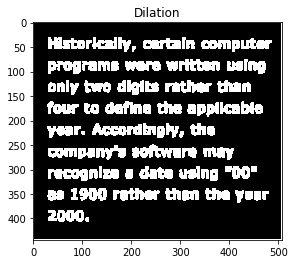

In [138]:
plt.imshow(dilation, cmap = 'gray'); plt.title('Dilation'); plt.show();

<h3>3. Opening</h3>

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

In [139]:
img = cv2.imread("./examples/Fig0911a.tif")

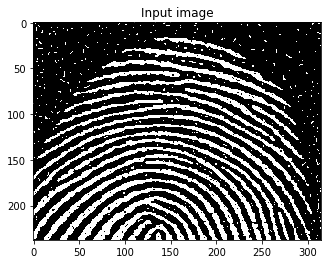

In [140]:
plt.imshow(img, cmap = 'gray'); plt.title('Input image'); plt.show();

In [141]:
kernel = np.ones((3,3),np.uint8)

In [142]:
opening = cv2.morphologyEx(img , cv2.MORPH_OPEN, kernel)

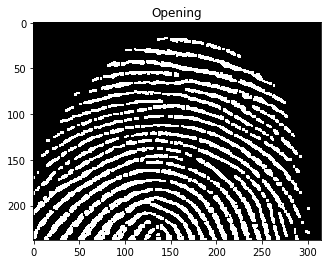

In [143]:
plt.imshow(opening, cmap = 'gray'); plt.title('Opening'); plt.show();

<h3>4. Closing</h3>

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [144]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

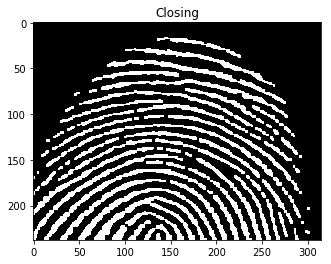

In [145]:
plt.imshow(closing, cmap = 'gray'); plt.title('Closing'); plt.show();

<h3>5. Morphological Gradient</h3>

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

In [146]:
img = cv2.imread("./examples/Fig0914a.tif")

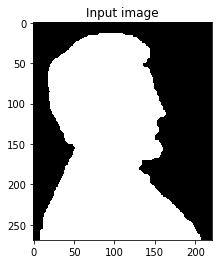

In [147]:
plt.imshow(img, cmap = 'gray'); plt.title('Input image'); plt.show();

In [148]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

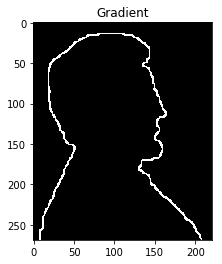

In [149]:
plt.imshow(gradient, cmap = 'gray'); plt.title('Gradient'); plt.show();

<h3>6. Top Hat</h3>

It is the difference between input image and Opening of the image.

In [150]:
img = cv2.imread("./examples/Fig0916a.tif")

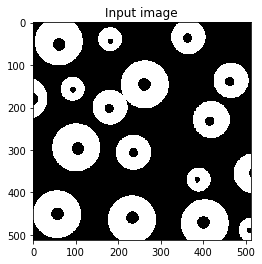

In [151]:
plt.imshow(img, cmap = 'gray'); plt.title('Input image'); plt.show();

In [152]:
kernel = np.ones((2,2),np.uint8)

In [153]:
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

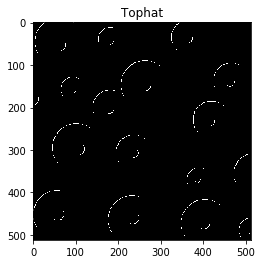

In [154]:
plt.imshow(tophat, cmap = 'gray'); plt.title('Tophat'); plt.show();

<h3>7. Black Hat</h3>

It is the difference between the closing of the input image and input image.

In [155]:
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

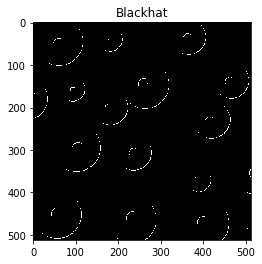

In [156]:
plt.imshow(blackhat, cmap = 'gray'); plt.title('Blackhat'); plt.show();